# Introducción
## Objetivo
Este programa se tuiliza para asignar grupos a estudiantes siguiendo las prioridades:
* Todos los estudiantes (o la mayor cantidad posible), deberían ser asignados a un grupo que hayan marcado como deseable
* Los estudiantes que presentan certificado laboral/deportivo recibem prioridad al momento de la asignación grupos

## Resultado
El programa genera como archivo de salida una tabla en la que se indica el grupo asignado a cada estudiante. En una columna adicional se indica si el turno asignado se encuentra entre los elegidos por el estudiante.

## Reglas
### Sobre los grupos
* Existe un numero $n$ de grupos
* Cada grupo $n_i$ tiene un numero determinado de cupos $c_i$
* Los grupos estan agregados en $S$ *supergrupos* que pueden corresponder a turnos (Matutino, Vespertino, Nocturno), salones de clase, centros de estudio, etc. Cada grupo $n_i$ pertenece a un único supergrupo $S_j$

### Sobre los estudiantes
* Existen $m$ estudiantes. Identificados por un número de cedula o pasaporte.
* Cada estudiante debe elegir al menos 1 grupo en al menos 2 supergrupos diferentes (Todos los estudiantes presentan como mínimo 2 opciones de grupo y 2 opciones de supergrupo).
* Los estudiantes pueden presentar certificado laboral o deportivo. En este caso los estudiantes tienen prioridad en la selección de grupos

# Parametros
A continuación se detallan los parametros necesarios para ejecutar el programa. Algunos de estos pueden tener un valor por defecto.

In [1]:
# Parametros del programa
# Parametros de los grupos
archivo_grupos = 'Grupos_Disponibles.txt'
columna_supergrupos = 'Turno'
columna_min_estudiantes = 'Min Estudiantes'
columna_max_estudiantes = 'Max Estudiantes'

# Parametros de los estudiantes
archivo_estudiantes = 'Formulario_Estudiantes.txt'
columnas_supergrupos = 'Grupos mañana___Grupos tarde___Grupos noche'
columnas_certificados = 'certificado'
columnas_identificacion = 'Cedula___pasaporte'

In [2]:
# Modulos
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [3]:
grupos = pd.read_csv(archivo_grupos, sep='\t', index_col=0)
grupos.head()

,Turno,Min Estudiantes,Max Estudiantes
ID grupo,,,
1,Turno 1,1,35
2,Turno 1,1,35
3,Turno 1,1,35
4,Turno 1,1,35
5,Turno 1,1,35


In [4]:
estudiantes = pd.read_csv(archivo_estudiantes, sep='\t')
estudiantes.head()

,Marca temporal,Correo,Cedula,pasaporte,Nacionali,NOMBRE completo,APELLIDOS,Fecha nacimiento,depto 2023,localidad 2024,barrio,udelar previa,otros estud,Grupos mañana,Grupos tarde,Grupos noche,TRABAJA,Deporte,certificado
0,26/02/2024 12:48:29,florencialado01@gmail.com,5165495,NaN,Uruguaya,Florencia,Lado Casaglia,03/04/2002,CANELONES,Canelones La Floresta,No vivo en montevideo,NO,NO,NaN,27,NaN,No,NO,NaN
1,26/02/2024 14:04:46,florencialado01@gmail.com,5165495,NaN,Uruguaya,Florencia,Lado Casaglia,03/04/2002,CANELONES,La floresta canelones,No vivo en montevideo,SI,NO,NaN,14,NaN,No,NO,NaN
2,26/02/2024 15:59:44,diegoodera9@gmail.com,44281309,NaN,Uruguaya,Diego Maximiliano,Odera Piñeyro,14/02/1992,MONTEVIDEO,Montevideo,Guaycuru 2884(barrio Reducto),SI,NO,NaN,9,15,SI,NO,https://drive.google.com/open?id=1A4_v2vYuuRva...
3,27/02/2024 21:53:05,diegoodera9@gmail.com,44281309,NaN,Uruguayo,Diego Maximiliano,Odera Piñeyro,14/02/1992,MONTEVIDEO,Montevideo,Reducto,SI,NO,NaN,66,15,SI,NO,https://drive.google.com/open?id=1VlUhv9N7JFFB...
4,26/02/2024 15:18:35,claumansilla46197@gmail.com,46197390,NaN,Oriental,Claudia Mariana,Mansilla Goicoechea,24/08/1993,MALDONADO,Maldonado,No,SI,NO,1,9,15,SI,NO,NaN


In [5]:
# parsear argumentos
super_group = columna_supergrupos
max_stds_col = columna_max_estudiantes
min_stds_col = columna_min_estudiantes

super_group_cols = columnas_supergrupos.split('___')
cert_cols = columnas_certificados.split('___')
id_cols = columnas_identificacion.split('___')

In [14]:
def preprocess_groups(groups, super_group_col, min_students_col, max_students_col):
    groups['SG'] = grupos[super_group_col].replace({val:idx for idx, val in enumerate(grupos.Turno.unique())})
    
    # ensure min and max student columns have standard names
    groups['min_students'] = groups[min_students_col]
    groups['max_students'] = groups[max_students_col]
preprocess_groups(grupos, columna_supergrupos, columna_min_estudiantes, columna_max_estudiantes)
grupos

/tmp/ipykernel_22922/681537370.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  groups['SG'] = grupos[super_group_col].replace({val:idx for idx, val in enumerate(grupos.Turno.unique())})


,Turno,Min Estudiantes,Max Estudiantes,SG,min_students,max_students
ID grupo,,,,,,
1,Turno 1,1,35,0,1,35
2,Turno 1,1,35,0,1,35
3,Turno 1,1,35,0,1,35
4,Turno 1,1,35,0,1,35
5,Turno 1,1,35,0,1,35
...,...,...,...,...,...,...
54,Turno 3,1,35,2,1,35
69,Turno 3,1,35,2,1,35
70,Turno 3,1,35,2,1,35


In [7]:
def preprocess_students(students, id_cols, super_group_cols):
    # identificar estudiantes
    id_cols = (~students[id_cols].isna()).sum(axis=0).sort_values(ascending=False).index
    
    identification = students[[id_cols[0]]].copy().rename(columns={id_cols[0]:'Id'})
    identification['Doc_type'] = id_cols[0]
    
    for col in id_cols[1:]:
        missing_ids = identification.Id.isna()
        identification.loc[missing_ids, 'Id'] = students.loc[missing_ids, col].values
        identification.loc[missing_ids, 'Doc_type'] = col
    
    students = pd.concat((students, identification), axis=1)
    
    # filter out records without assigned groups
    no_groups = (~students[super_group_cols].isna()).sum(axis=1) == 0
    filtered_students = students.loc[no_groups]
    students = students.loc[~no_groups]
    return students, filtered_students
students, filtered_students = preprocess_students(estudiantes, id_cols, super_group_cols)
students

,Marca temporal,Correo,Cedula,pasaporte,Nacionali,NOMBRE completo,APELLIDOS,Fecha nacimiento,depto 2023,localidad 2024,...,udelar previa,otros estud,Grupos mañana,Grupos tarde,Grupos noche,TRABAJA,Deporte,certificado,Id,Doc_type
0,26/02/2024 12:48:29,florencialado01@gmail.com,5165495,NaN,Uruguaya,Florencia,Lado Casaglia,03/04/2002,CANELONES,Canelones La Floresta,...,NO,NO,NaN,27,NaN,No,NO,NaN,5165495,Cedula
1,26/02/2024 14:04:46,florencialado01@gmail.com,5165495,NaN,Uruguaya,Florencia,Lado Casaglia,03/04/2002,CANELONES,La floresta canelones,...,SI,NO,NaN,14,NaN,No,NO,NaN,5165495,Cedula
2,26/02/2024 15:59:44,diegoodera9@gmail.com,44281309,NaN,Uruguaya,Diego Maximiliano,Odera Piñeyro,14/02/1992,MONTEVIDEO,Montevideo,...,SI,NO,NaN,9,15,SI,NO,https://drive.google.com/open?id=1A4_v2vYuuRva...,44281309,Cedula
3,27/02/2024 21:53:05,diegoodera9@gmail.com,44281309,NaN,Uruguayo,Diego Maximiliano,Odera Piñeyro,14/02/1992,MONTEVIDEO,Montevideo,...,SI,NO,NaN,66,15,SI,NO,https://drive.google.com/open?id=1VlUhv9N7JFFB...,44281309,Cedula
4,26/02/2024 15:18:35,claumansilla46197@gmail.com,46197390,NaN,Oriental,Claudia Mariana,Mansilla Goicoechea,24/08/1993,MALDONADO,Maldonado,...,SI,NO,1,9,15,SI,NO,NaN,46197390,Cedula
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,28/02/2024 21:49:31,futuloco1@gmail.com,5515027-8,NaN,Uruguaya,Federico daniel,Piñeiro bardier,24/05/2005,CANELONES,Montevideo,...,SI,NO,4,11,NaN,No,NO,NaN,5515027-8,Cedula
2086,26/02/2024 14:45:29,eugeniaalonso51@gmail.com,5573221-,NaN,Uruguaya,Eugenia,Alonso García,17/01/2006,MONTEVIDEO,Montevideo,...,SI,NO,"19, 20, 21, 22",NaN,NaN,No,NO,NaN,5573221-,Cedula
2087,26/02/2024 13:34:16,eugeniaalonso51@gmail.com,5573221-6,NaN,Uruguaya,Eugenia,Alonso García,17/01/2006,MONTEVIDEO,Montevideo,...,SI,NO,1,NaN,NaN,No,NO,NaN,5573221-6,Cedula
2088,28/02/2024 18:01:55,santiagolacu@gmail.com,5601410-2,NaN,Uruguayo,Santiago,Lacuesta Menchaca,22/10/2005,MONTEVIDEO,montevideo,...,SI,NO,"24, 38","13, 14",NaN,No,NO,NaN,5601410-2,Cedula


In [8]:
def build_demand_table(students, groups, super_group_cols):
    uniq_students = students.Id.unique()
    demand_tab = pd.DataFrame(False, index=uniq_students, columns=groups.index)

    # mark groups demanded by each student
    for ID, subtab in students.groupby('Id'):
        # merge all group options
        student_opts = ','.join(subtab[super_group_cols].fillna('').agg(','.join, axis=1).values)
        # remove weird values, leading commas, empty spaces
        student_opts = re.sub('^,', '', re.sub(',$', '', re.sub(',,+', ',', re.sub(' ','', student_opts))))
        # generate options array
        student_opts = np.unique(student_opts.split(',')).astype(int)
        # mark student options
        demand_tab.loc[ID, student_opts] = True

    # remove weird groups (error when registering option number)
    weird_groups = demand_tab.drop(columns=groups.index)
    demand_tab = demand_tab[groups.index]
    return demand_tab, weird_groups

def get_certified_students(students, cert_cols):
    uniq_students = students.Id.unique()
    # establish priority students
    certified = pd.Series(False, index=uniq_students)
    certified[students.loc[~students[cert_cols].isna().values, 'Id'].unique()] = True
    return certified

def summarize_demand(demand, groups):
    total_demand = demand.sum(axis=0)
    options_tab = pd.DataFrame(index=demand.index, columns=groups.SG.unique())
    for sg, subtab in groups.groupby('SG'):
        options_tab[sg] = demand[subtab.index].sum(axis=1)
    options_tab['Total_options'] = options_tab.sum(axis=1)
    return total_demand, options_tab

def get_infringing_students(options, certified, min_groups, min_sg):
    infractions = (options.drop(columns='Total_options') > min_groups).sum(axis=1) < min_sg
    infractions = infractions & ~certified
    return infractions

def pre_report(demand_tab, groups, certified, total_demand, infractions):
    # report number of groups
    print(f'Grupos: {demand_tab.shape[1]}')
    for sg, subtab in groups.groupby('SG'):
        print(f'\tSupergrupo {sg}: {subtab.shape[0]} grupos')
    print()

    # report number of studens
    print(f'Estudiantes validos: {demand_tab.shape[0]}')
    print(f'Estudiantes certificados: {certified.sum()}')
    print(f'EStudiantes en infraccion: {infractions.sum()}')
demand_tab, weird_groups = build_demand_table(students, grupos, super_group_cols)
certified = get_certified_students(students, cert_cols)
total_demand, options_tab = summarize_demand(demand_tab, grupos)
infractions = get_infringing_students(options_tab, certified, 2, 2)

pre_report(demand_tab, grupos, certified, total_demand, infractions)

Grupos: 72
	Supergrupo 0: 32 grupos
	Supergrupo 1: 24 grupos
	Supergrupo 2: 16 grupos

Estudiantes validos: 1770
Estudiantes certificados: 395
EStudiantes en infraccion: 1002


# NOTA
Decirle a laura de modificar el formulario de ingreso para que los grupos sean casillas marcables en lugar de campos de texto. Esto evita problema de numeros de grupos equivocados y asegura que se cumpla la regla de al menos dos grupos.

## Asignación por double-sorting
Ordenar la tabla de demandas en ambos ejes (double-sorting).

Los estudiantes se ordenan de acuerdo al número de alternativas disponibles (menos a mas) y a su estatus de certificación (certificados primero).

Los grupos se ordenan en función de la demanda total (menos demandados primero).

### Asignación por supergrupo
Los supergrupos se ordenan en función del número de estudiantes que quieren entrar. Comenzando por el menos requerido, asignar estudiantes por *double-sorting*. Actualizar demanda de los grupos restantes sin contar a los estudiantes acomodados y continuar asignación. Repetir hasta recorrer todos los supergrupos.

In [9]:
# get supergroup_demands
def get_sg_demands(groups, demand):
    sg_demands = pd.Series()
    for sg, subtab in groups.groupby('SG'):
        try:
            sg_demands[sg] = demand[subtab.index].any(axis=1).sum()
        except:
            continue
    sg_demands.sort_values(inplace=True)
    return sg_demands

sg_demands = get_sg_demands(grupos, demand_tab)
sg_demands

2     414
1    1206
0    1558
dtype: int64

In [118]:
def double_sorting(demand_tab, groups, certified):
    # calculate max iterations (size of largest group)
    max_iterations = groups.loc[demand_tab.columns].max_students.max()
    # prepare placement table
    placement_tab = pd.DataFrame(False, index=demand_tab.index, columns=demand_tab.columns)

    # count student options and detect certified
    student_data = demand_tab.sum(axis=1).to_frame(name='options')
    student_data['certified'] = certified.loc[student_data.index].apply(lambda x : 0 if x else 1)
    # sort by certification status & options
    student_data.sort_values(['certified', 'options'])

    def sort_groups(dtab):
        # sort demand table by group demand, filter out depleted groups
        group_demand = dtab.sum(axis=0).sort_values()
        group_demand = group_demand[group_demand > 0]
        dtab_out = dtab[group_demand.index].copy()
        return dtab_out
    demand_tab2 = sort_groups(demand_tab)

    # iterate
    for i in range(max_iterations):
        # always start placing by the least required groups
        for grp in demand_tab2.columns:
            # check that group hasn't been depleted in the current iteration
            if demand_tab2[grp].sum() > 0:
                grp_student = demand_tab2.index[np.argmax(demand_tab2[grp])] # select the most prioritary student for the current group (certified & least options)
                # place selected student and remove them from the demand table
                placement_tab.loc[grp_student, grp] = True
                demand_tab2.drop(index=grp_student, inplace=True)
        # recalculate demand, resort groups by least demand, drop not demanded groups
        demand_tab2 = sort_groups(demand_tab2)

    # announce total unplaced students
    total_students = demand_tab.shape[0]
    placed_students = placement_tab[placement_tab.any(axis=1)].index.values
    unplaced_students = demand_tab2
    print('Done assigning!')
    print(f'\tAssigned {len(placed_students)} students of {total_students}')
    display(placement_tab.sum(axis=0).sort_values().to_frame(name='Assigned').T)
    print(f'\tFailed to assign {unplaced_students.shape[0]} students')
    display(unplaced_students)
    return placement_tab, unplaced_students

#### Distribution method 3
Assign students without dividing supergroups

In [120]:
# distribution method 3
whole_placement, whole_unplaced = double_sorting(demand_tab, grupos, certified)

Done assigning!
	Assigned 1697 students of 1770


ID grupo,70,69,53,54,52,71,72,35,34,33,...,10,2,8,6,24,38,9,13,14,1
Assigned,18,18,18,19,19,19,20,21,21,21,...,26,26,26,26,35,35,35,35,35,35


	Failed to assign 73 students


ID grupo,9,1,14,24,13,38
55828178,False,False,False,False,False,True
55841013,False,False,False,True,False,True
55905188,False,False,False,False,True,True
55906994,False,False,False,False,True,True
55916981,False,False,False,True,True,False
...,...,...,...,...,...,...
65956486,False,False,False,True,False,True
66239586,False,False,False,False,True,True
66447858,True,False,False,False,False,False
5573221-6,False,True,False,False,False,False


#### Acomodación
Seleccionar los grupos llenos, determinar si alguno de los estudiantes asignados puede transferirse a un grupo con espacio disponible

In [131]:
def get_transferrable_students(placement_tab, demand_tab, max_students=35):
    student_counts = placement_tab.sum(axis=0)
    full_groups = student_counts[student_counts == max_students].index.values
    students_in_full = placement_tab[placement_tab[full_groups].any(axis=1)].index.values

    transferrable_students = demand_tab.loc[students_in_full].drop(columns=full_groups)
    transferrable_students = transferrable_students.loc[transferrable_students.any(axis=1), transferrable_students.any(axis=0)]
    return transferrable_students

def arrange_transfer(transferrable, placement_tab, max_students=35):
    avail_places = max_students - placement_tab[transferrable.columns].sum(axis=0)
    avail_places = avail_places[avail_places > 0].sort_values(ascending=False)

    transfer_series = pd.Series(-1, index=transferrable.index)

    # sort transferrable students by options
    transferrable = transferrable.iloc[np.argsort(transferrable.sum(axis=1))].copy()
    for grp, places in avail_places.items():
        group_students = transferrable[grp]
        group_students = group_students.loc[group_students].iloc[:places].index.values
        transfer_series[group_students] = grp
        transferrable.drop(index=group_students, inplace=True)
    transfer_series = transfer_series[transfer_series > -1]
    return transfer_series

def transfer(placement_tab, transfer_series):
    placement_tab2 = placement_tab.copy()
    placement_tab2.loc[transfer_series.index] = False
    for student, grp in transfer_series.items():
        placement_tab2.loc[student, grp] = True
    return placement_tab2

def accomodate(placement_tab, unplaced_students, max_students=35):
    avail_places = max_students - placement_tab[unplaced_students.columns].sum(axis=0)
    avail_places = avail_places[avail_places > 0].sort_values()
    unplaced_students = unplaced_students[avail_places.index]

    # sort unplaced students by number of options
    unplaced_students = unplaced_students.iloc[np.argsort(unplaced_students.sum(axis=1))].copy()
    for grp in unplaced_students.columns:
        grp_students = unplaced_students[grp]
        grp_students = grp_students[grp_students].index.values[avail_places[grp]]

        placement_tab.loc[grp_students, grp] = True
        unplaced_students.drop(index=grp_students, inplace=True)
    return unplaced_students
transferrable = get_transferrable_students(whole_placement, demand_tab)

t_series = arrange_transfer(transferrable, whole_placement)

placement2 = transfer(whole_placement, t_series)

unplaced2 = accomodate(placement2, whole_unplaced)

In [132]:
unplaced2

ID grupo,1,14,24,13,38,9
55828178,False,False,False,False,True,False
66447858,False,False,False,False,False,True
65428736,True,False,False,False,False,False
63915701,True,False,False,False,False,False
59380297,True,False,False,False,False,False
...,...,...,...,...,...,...
56050948,False,True,True,True,True,False
56041212,False,True,True,True,True,False
56032166,False,True,True,True,True,False
57446330,False,True,True,True,True,False


## Fase de asignación
En esta fase se intenta asignar a todos los estudiantes a alguno de los grupos que solicitaron.
1) Se suma el numero de estudiantes que solicitan entrar a cada grupo
2) Los grupos se ordenan (ascendente) en función del numero de estudiantes
3) Para cada grupo, comenzando por el grupo menos solicitado
    1) Se selecciona un conjunto de estudiantes:
        * En primer lugar se priorizan los estudiantes sin opciones alternativas (los estudiantes dentro de este grupo que no puedan ser asignados quedarán por fuera de los grupos)
        * Si quedan lugares disponibles luego de colocar a los estudiantes sin alternativas, se intenta colocar a los estudiantes con certificado prioritario.
        * Si quedan lugares disponibles, se rellena el grupo con estudiantes no prioritarios.
    2) Cuando se termina de asignar estudiantes a un grupo, el resto de las solicitudes de estos estudiantes se elimina de la tabla

Tabla boolean *sorted_students* (indices: ids de estudiantes, columnas: grupos) indica el grupo al que cada estudiante fue asignado. Los estudiantes que queden afuera tienen valor *False* para todos los grupos.

In [135]:
# count & sort students
student_counts = places_tab.sum(axis=0).sort_values()
max_places = grupos.loc[student_counts.index, max_stds_col]
count_record = np.tile((student_counts - max_places).values, (len(student_counts), 1))

In [136]:
def choose(candidates, n):
    choice = np.arange(len(candidates))[candidates]
    if n < len(choice):
        choice = np.random.choice(choice, n, replace=False)
    return choice

def select_students(candidates, single_option, certified_candidates, max_students):
    selected = np.full(candidates.sum(), False)

    # get candidates with a single remaining option
    single_total = single_option.sum()
    if single_total > max_students:
        raise Exception(f'{single_total} students with a single remaining option for a group with {max_students} places')
    selected[single_option] = True
    remaining_places = max_students - selected.sum()
    
    # get certified candidates
    certified_candidates_unassigned = certified_candidates & ~selected
    kept_cert = choose(certified_candidates_unassigned, remaining_places)
    selected[kept_cert] = True
    remaining_places = max_students - selected.sum()

    # fill out group
    non_priority_candidates = ~(single_option | certified_candidates)
    kept_non_priority = choose(non_priority_candidates, remaining_places)
    selected[kept_non_priority] = True

    selected_candidates = candidates.copy()
    selected_candidates[candidates] = selected
    return selected_candidates

In [137]:
# iterate & sort students (re sort demand after each iteration)
sorted_students = pd.DataFrame(False, index = places_tab.index, columns = places_tab.columns)
places_tab2 = places_tab.copy()
done_groups = []
demand_log = []
for group_idx in np.arange(places_tab2.shape[1]):
    # fill less demanded group
    demand = places_tab2.drop(columns=done_groups).sum(axis=0).sort_values()
    demand_log.append(places_tab2.sum(axis=0))
    least_wanted = demand.index[0]
    group_candidates = places_tab2[least_wanted]
    
    # get students to keep (certified students & students with no remaining options)
    single_option = places_tab2.loc[group_candidates].sum(axis=1) == 1
    certified_candidates = certified.loc[group_candidates].values
    try:
        selected_candidates = select_students(group_candidates, single_option, certified_candidates, max_places.loc[least_wanted])
    except Exception as excp:
        print(f'Group {least_wanted}: {excp}')
        break
    sorted_students.loc[selected_candidates, least_wanted] = True
    places_tab2.loc[selected_candidates] = False
    done_groups.append(least_wanted)


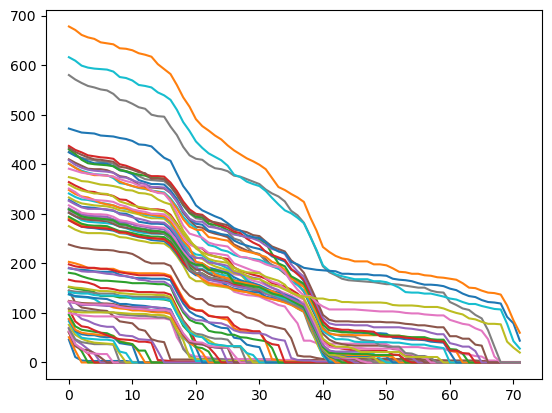

In [138]:
# plot demand change
import matplotlib as pyplot
demand_log = pd.DataFrame(demand_log)[done_groups]
fig, ax = plt.subplots()

x = np.arange(demand_log.shape[0])
for row in demand_log.to_numpy().T:
    ax.plot(x, row)

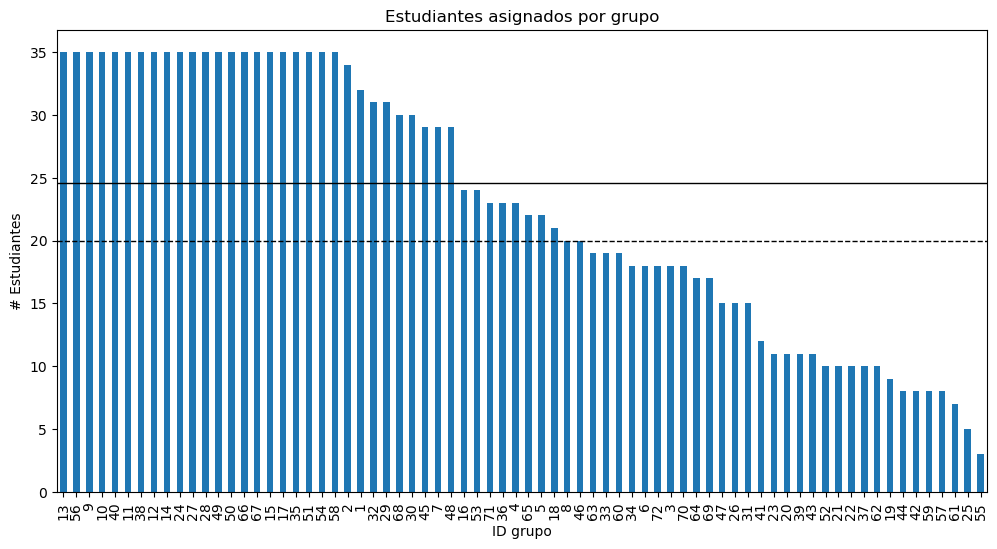

In [139]:
fig, ax = plt.subplots(figsize=(12,6))
sorted_students.sum(axis=0).sort_values(ascending=False).plot(kind='bar', ylabel='# Estudiantes', ax = ax, title='Estudiantes asignados por grupo')

ax.axhline(y = mean_students_per_group, color='k', linewidth=1)
ax.axhline(y = min_students_per_group, color='k', linewidth=1, linestyle='--')

In [144]:
places_tab.sum(axis=0).sort_values()

ID grupo
54     46
53     51
72     61
52     61
71     61
     ... 
3     437
13    472
1     580
24    616
38    678
Length: 72, dtype: int64

In [145]:
# accomodate from least required
demand_tab = places_tab.sum(axis=0).sort_values()
options_tab = places_tab.sum(axis=1)
places_tab2 = places_tab.copy()
sorted_students = pd.DataFrame(False, index=places_tab.index, columns=places_tab.columns)

def select_students(group_students, options_tab, max_students):
    student_options = options_tab.loc[group_students].sort_values()
    selected_students = student_options.index[:max_students]
    return selected_students

demand_log = pd.DataFrame(columns=places_tab.columns)
demand_log.loc[0, demand_tab.index] = demand_tab.values

for i in range(len(demand_tab)):
    demand_filtered = demand_tab[demand_tab > min_students_per_group]
    if len(demand_filtered) == 0:
        breakMar, 22/10/2024 - 10:00 - Lun, 04/11/2024 - 23:59 
    group = demand_filtered.index[0]
    group_students = places_tab2.index[places_tab2[group]]
    group_students = select_students(group_students, options_tab, grupos.loc[group, 'Max Estudiantes'])
    sorted_students.loc[group_students, group] = True
    places_tab2 = places_tab2.drop(index=group_students).drop(columns=group)
    demand_tab = places_tab2.sum(axis=0).sort_values()

    demand_log.loc[i+1] = 0
    demand_log.loc[i+1, demand_tab.index] = demand_tab.values

In [146]:
sorted_students.sum()

ID grupo,1,2,3,4,5,6,7,8,19,20,...,35,36,51,52,53,54,69,70,71,72
5165495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44281309,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
46197390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
46267224,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48527452,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.572.186-1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5483884-1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5515027-8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5573221-,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [141]:
places_tab2.shape

(62, 19)

In [ ]:
demand_log

In [ ]:
sorted_students.sum(axis=0).value_counts()

In [ ]:
places_tab3 = places_tab.loc[places_tab2.index]
demand_tab3 = places_tab3.sum(axis=0).sort_values()
demand_tab3.loc[demand_tab3 > 0]

## Fase de acomodación
Es posible que al final de la fase de asignación queden algunos estudiantes sin grupo asignado. Antes de asignarlos a un grupo que no pidieron, podemos evaluar relocalizar alguno de los estudiantes ya asignados, en caso de haber seleccionado algún grupo que esté por debajo del limite.

En esta fase:
1) Construimos una matriz de transferencia de tamaño $n \times n$ en la que se indica cuantos estudiantes asignados a cada grupo pueden ser transferidos a algún otro grupo.
|||Grupos destino|||
|:-:|:-:|:-:|:-:|:-:|
|||$B$|$C$|
|**Grupos origen**|$A$|$T^A_B$|$T^A_C$|

Siendo $T^A_B$ y $T^A_C$ el numero de estudiantes asignados al grupo $A$ que podrían transferirse al grupo $B$ o al grupo $C$ respectivamente

2) ~Las columnas de los grupos destino que se encuentren saturados son eliminadas de la tabla, ya que no es posible transferir estudiantes a las mismas.~
2) ~Se seleccionan las filas de los grupos origen que fueron solicitados por los estudiantes sin grupo asignado~
3) ~Se calcula el maximo de estudiantes transferibles de para cada grupo requerido~
4) ~Iterativamente se transfieren estudiantes fuera de los grupos requeridos para colocar estudiantes que quedaron fuera~
    1) ~Los estudiantes sin grupo se ordenan en función del numero de opciones (ascendente)~
    2) ~Se selecciona entre sus opciones aquella con el mayor numero de transferencias posible~
    3) ~Se coloca al estudiante, desplazando a uno de los ya asignados a una de sus opciones alternativas (la menos saturada)~
___
2) Se ordenan los estudiantes excluidos en función del numero de alternativas presentadas (ascendente)
2) Para cada estudiante se busca recursivamente para cada una de sus opciones una cadena de transferencia que libere un lugar para colocarlo/a:
    1) Seleccionar los candidatos de transferencia de todas las opciones del estudiante, si alguno no está saturado, desplazar estudiantes a lo largo de la cadena de transferencias para generar un lugar para el estudiante
    2) Si todos los candidatos estan saturados, inspeccionar *sus* candidatos de transferencia
    3) Continuar recursivamente hasta encontrar una cadena de transferencias
    4) Para evitar recursión infinita, omitir candidatos ya visitados (es posible que no haya una cadena de transferencias posible)

In [ ]:
# build transference table
transfer_tab = pd.DataFrame(0, index=grupos.index, columns=grupos.index)
free_places = max_places - sorted_students.sum(axis=0)
# populate transference table
for grp in grupos.index:
    transfer_options = places_tab.loc[sorted_students[grp]].sum(axis=0)
    transfer_options[grp] = 0
    transfer_tab.loc[grp] = transfer_options
transfer_tab

In [ ]:
# get students without group
no_group_students = sorted_students.sum(axis=1) == 0
no_group_students = no_group_students.loc[no_group_students].index
no_group_students

# count options of students without group
no_group_std_options = places_tab.loc[no_group_students].sum(axis=0)
no_group_std_options = no_group_std_options.loc[no_group_std_options > 0].sort_values()
no_group_std_options

In [ ]:
alt_group = 13
# build transfer chain
required_places = no_group_std_options.loc[alt_group]

# get output ways for the option group
option_alternatives = transfer_tab.loc[alt_group]
option_alternatives = option_alternatives.loc[option_alternatives > 0]
group_outs = option_alternatives.apply(lambda x : min(x, required_places)).sort_values(ascending=False)
group_outs

# see how many available places at the current level
available_places = free_places.loc[group_outs.index].sort_values()
open_groups = available_places.loc[available_places > 0]
max_available = available_places.max()
min_available = available_places.min()

option_alternatives

In [ ]:
def get_transfer_path(tab, origin):
    # get options of students in the origin group
    options = tab.T.query('@tab[@origin] > ')

## Desbandar grupos
Queremos que los grupos de estudiantes estén los más cercanos al promedio de estudiantes por grupo (# estudiantes / # grupos). Particularmente, queremos que no haya grupos subpoblados, ya que provocan una mayor dilución del trabajo docente para un número reducido de estudiantes.

Definimos un mínimo absoluto de estudiantes por grupo, el 80% de la media de estudiantes. Ningún grupo puede terminar con menos estudiantes.

### Estrategia 1
Comenzando por el grupo menos requerido, desbandamos grupos, enviando a los estudiantes a alguna de las alternativas. Los cursos ya transitados quedan inhabilitados.

### Estrategia 2
Tomar todos los grupos sub poblados y volver a repartir los estudiantes, esta vez reforzando el minimo permitido

### Estrategia 3
Tomar todos los grupos subpoblados, seleccionar el minimo numero de grupos que permita acomodar a todos los estudiantes


In [ ]:
occupation_tab = sorted_students.sum(axis=0)
underpop_groups = occupation_tab.loc[occupation_tab <= mean_students_per_group].sort_values()
underpop_groups

In [ ]:
# select students to reshuffle
reshuffle_tab = places_tab.loc[sorted_students[underpop_groups.index].any(axis=1)][underpop_groups.index]
demand_tab = reshuffle_tab.sum(axis=0).sort_values()
options_tab = reshuffle_tab.sum(axis=1)
reshuffle_tab

In [ ]:
sorted_students_b = pd.DataFrame(False, index=reshuffle_tab.index, columns=reshuffle_tab.columns)

for i in range(len(demand_tab)):
    demand_filtered = demand_tab[demand_tab > min_students_per_group]
    if len(demand_filtered) == 0:
        break
    group = demand_filtered.index[0]
    group_students = reshuffle_tab.index[reshuffle_tab[group]]
    sorted_students_b.loc[group_students, group] = True
    reshuffle_tab = reshuffle_tab.drop(index=group_students).drop(columns=group)
    demand_tab = reshuffle_tab.sum(axis=0).sort_values()

In [ ]:
sorted_students_b.sum(axis=0)